## Problem Statement 1:
There is an automobile company Cars24X7 from India  which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.<br/>
They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.  Essentially, the company wants to know:
Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered  a large dataset of different types of cars across the American market.
Business Objectives:<br/>
You as a Data scientist are required to apply some data science techniques  for the price of cars with the available independent variables.  That should help the management to understand how exactly the prices vary with the independent variables. 
 They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.<br/>
 Also build the Random Forest Regressor for optimal search of classifiers.
Dataset: data1.csv
Note : kindly build the project with following pointers
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Result with error calculation

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing machine learning libaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

pd.options.display.max_columns=None
pd.options.display.max_rows=100

In [2]:
df=pd.read_csv('data1.csv')#read dataset

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0
4,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0


In [4]:
df.describe() # only one numerical column

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2013.623333,4.655167,7.625200,36958.933333,0.043333
std,2.895295,5.090190,8.658372,38951.324671,0.248317
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.875000,1.200000,15000.000000,0.000000
50%,2014.000000,3.555000,6.250000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48825.250000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       300 non-null    object 
 1   Year           300 non-null    float64
 2   Selling_Price  300 non-null    float64
 3   Present_Price  300 non-null    float64
 4   Kms_Driven     300 non-null    float64
 5   Fuel_Type      300 non-null    object 
 6   Seller_Type    300 non-null    object 
 7   Transmission   300 non-null    object 
 8   Owner          300 non-null    float64
dtypes: float64(5), object(4)
memory usage: 29.3+ KB


In this data set there are two columns which are categorical 
- year 
- fuel_type
- seller_type
- transmission

In this dataset columns which are numerical are

- year
- selling_price
- present_price
- kms_driven

In [6]:
df.shape #no of rows x columns

(415, 9)

In [7]:
df.duplicated().sum() #number of dublicates

116

In [8]:
df.drop_duplicates(inplace=True) # droping dublicates

In [9]:
df.columns=df.columns.str.replace(' ','_').str.lower() # converting names of columns to snake case

In [10]:
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'kms_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [11]:
(df.isnull().sum()/len(df))*100 #null values

car_name         0.334448
year             0.334448
selling_price    0.334448
present_price    0.334448
kms_driven       0.334448
fuel_type        0.334448
seller_type      0.334448
transmission     0.334448
owner            0.334448
dtype: float64

In [12]:
df.dropna(inplace=True) #droping null values

In [13]:
df.shape

(298, 9)

In [14]:
(df.isnull().sum()/len(df))*100

car_name         0.0
year             0.0
selling_price    0.0
present_price    0.0
kms_driven       0.0
fuel_type        0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

Selling price VS Time

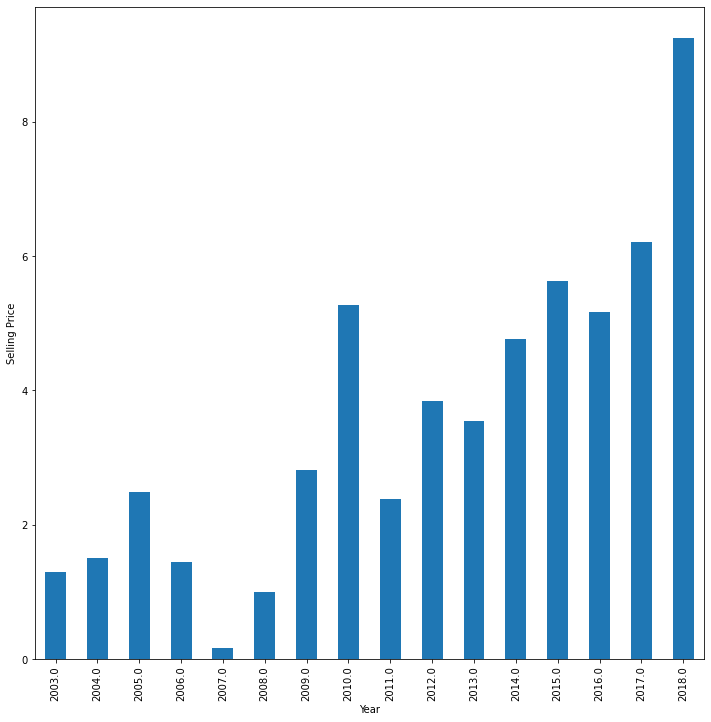

In [15]:
plt.figure(figsize=(12,12))
df.groupby(df.year)['selling_price'].mean().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [16]:
df.selling_price.describe()

count    298.000000
mean       4.583221
std        4.991389
min        0.100000
25%        0.825000
50%        3.505000
75%        5.987500
max       35.000000
Name: selling_price, dtype: float64

Selling price vs Present Price

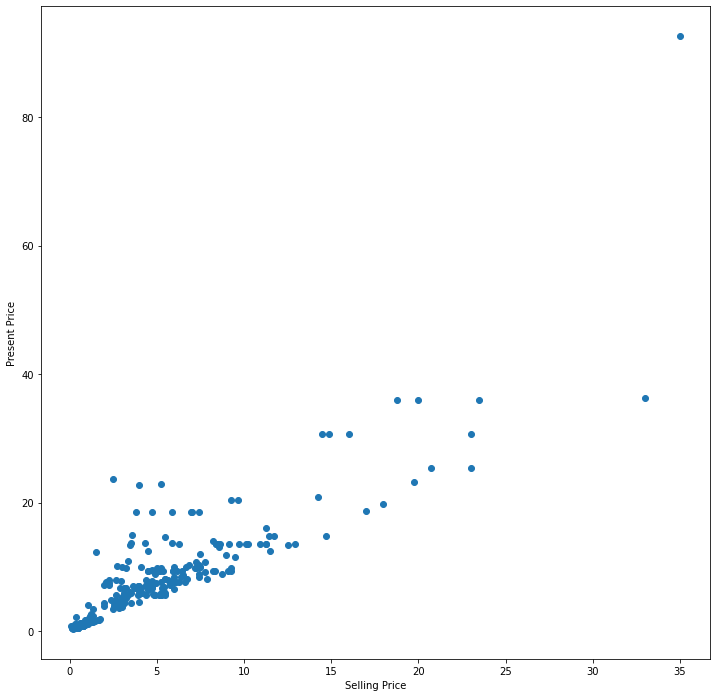

In [17]:
plt.figure(figsize=(12,12))
plt.scatter(x=df.selling_price,y=df.present_price)
plt.xlabel('Selling Price')
plt.ylabel('Present Price')
plt.show()

Year VS Different Fuel Types

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


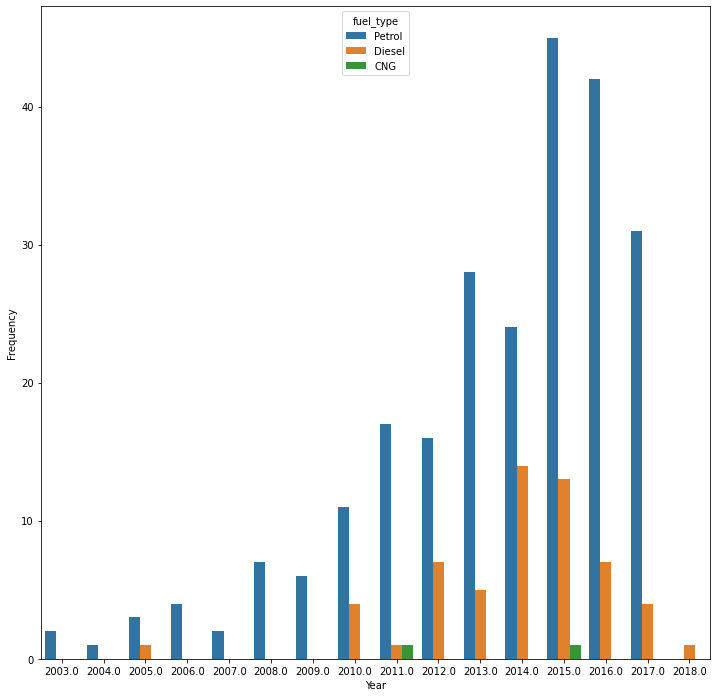

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(df.year,hue=df.fuel_type,data=df)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

Checking which is more Prefereable in Transmission and checking their Highest selling Price

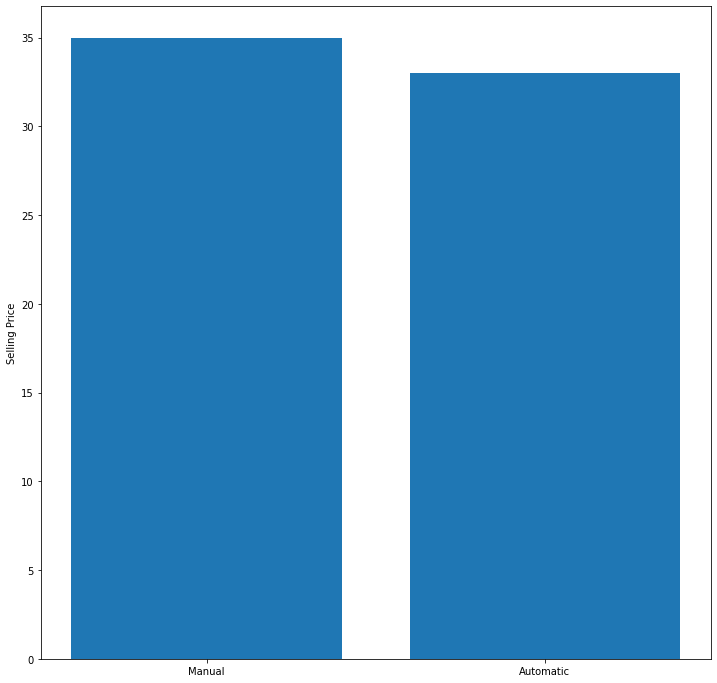

In [19]:
plt.figure(figsize=(12,12))
plt.bar(df.transmission,df.selling_price)
plt.ylabel('Selling Price')
plt.show()

Selling Price Vs Kilometer Driven

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


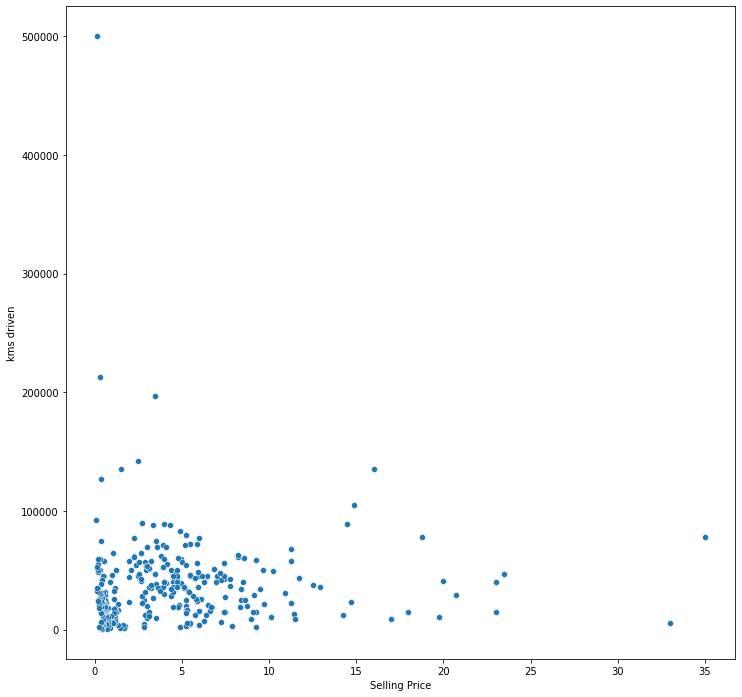

In [20]:
plt.figure(figsize=(12,12))
sns.scatterplot(df.selling_price,df.kms_driven)
plt.xlabel('Selling Price')
plt.ylabel('kms driven')
plt.show()

checkng presence of outliers in Selling Price Column

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


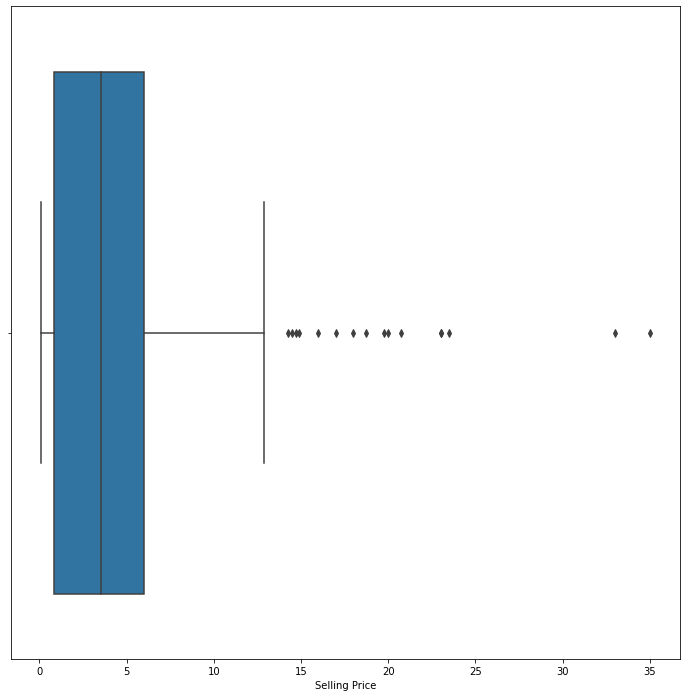

In [21]:
plt.figure(figsize=(12,12))
sns.boxplot(df.selling_price,data=df)
plt.xlabel('Selling Price')
plt.show()

Counting the Dealer if their individuals or selling thru dealers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


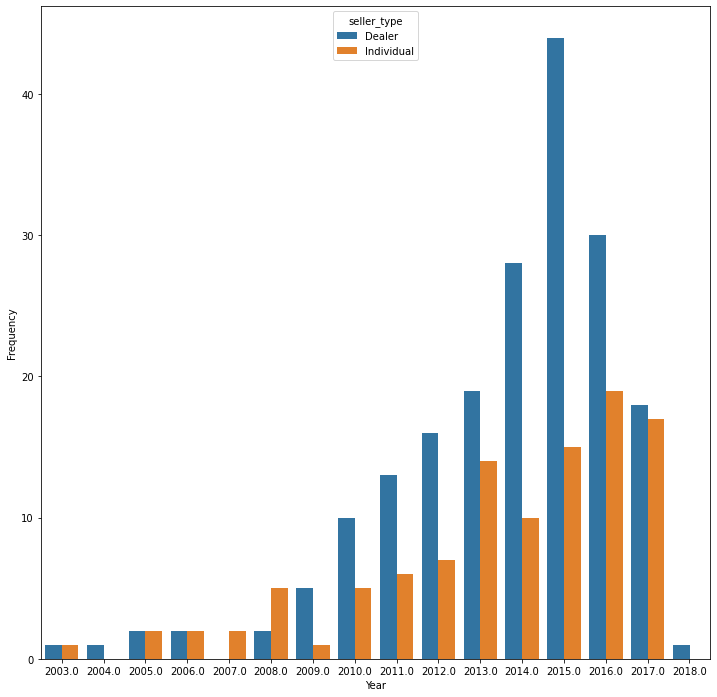

In [22]:
plt.figure(figsize=(12,12))
sns.countplot(df.year,hue=df.seller_type,data=df)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

Selling Price VS Seller Type

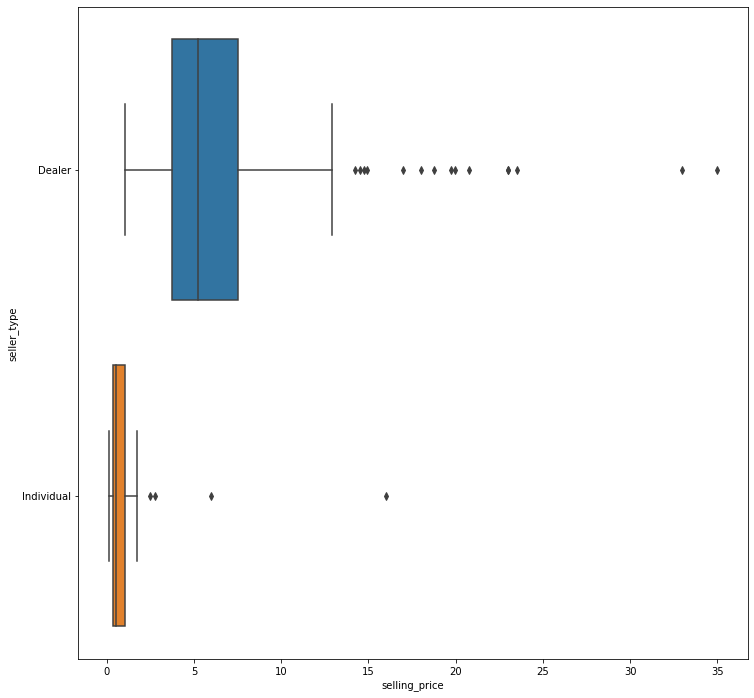

In [23]:
plt.figure(figsize=(12,12))
sns.boxplot(x=df.selling_price,y=df.seller_type,data=df)
plt.show()

In [24]:
#droping column car name as it has unique values which are many
df.drop(['car_name'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           298 non-null    float64
 1   selling_price  298 non-null    float64
 2   present_price  298 non-null    float64
 3   kms_driven     298 non-null    float64
 4   fuel_type      298 non-null    object 
 5   seller_type    298 non-null    object 
 6   transmission   298 non-null    object 
 7   owner          298 non-null    float64
dtypes: float64(5), object(3)
memory usage: 29.1+ KB


In [26]:
df.head()

,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0
3,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0
4,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0


In [27]:
df.select_dtypes('object').nunique() #selecting Object Or Caterogical Columns

fuel_type       3
seller_type     2
transmission    2
dtype: int64

In [28]:
categorical_columns=['fuel_type','seller_type','transmission']

In [29]:
for i in categorical_columns:
  print(f'{i}--->{df[i].unique()}')

fuel_type--->['Petrol' 'Diesel' 'CNG']
seller_type--->['Dealer' 'Individual']
transmission--->['Manual' 'Automatic']


In [30]:
# encoding "Fuel_Type" Column
df.replace({'fuel_type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'seller_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [31]:
df.head()

,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,2014.0,3.35,5.59,27000.0,0,0,0,0.0
1,2013.0,4.75,9.54,43000.0,1,0,0,0.0
2,2017.0,7.25,9.85,6900.0,0,0,0,0.0
3,2011.0,2.85,4.15,5200.0,0,0,0,0.0
4,2014.0,4.60,6.87,42450.0,1,0,0,0.0


Corelations Between varaibles 

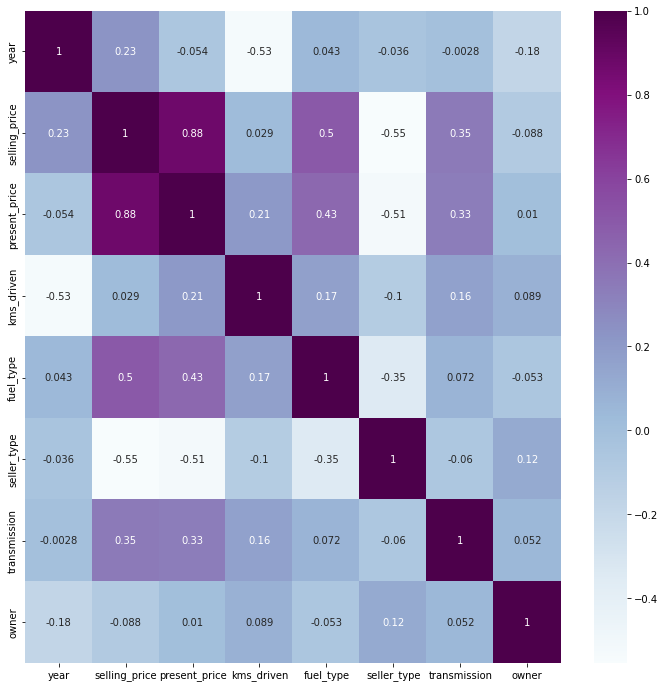

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

In [33]:
#converting years into number of years
# df['year'].max()

In [34]:
# df['current_year']=2023
# df['years']=df.current_year-df.year
# df.drop(['year','current_year'],axis=1,inplace=True)

In [35]:
x=df.drop(['selling_price'],axis=1)

In [36]:
y=df['selling_price']

In [37]:
x.head()

,year,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,2014.0,5.59,27000.0,0,0,0,0.0
1,2013.0,9.54,43000.0,1,0,0,0.0
2,2017.0,9.85,6900.0,0,0,0,0.0
3,2011.0,4.15,5200.0,0,0,0,0.0
4,2014.0,6.87,42450.0,1,0,0,0.0


In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: selling_price, dtype: float64

Test-Train Split

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Linear regression Model

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [41]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [42]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8847809482057468


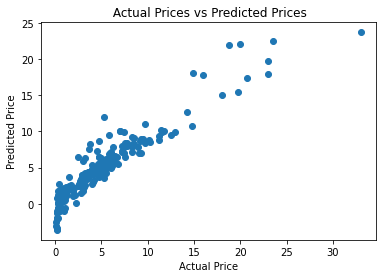

In [43]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [44]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [45]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.784969389389149


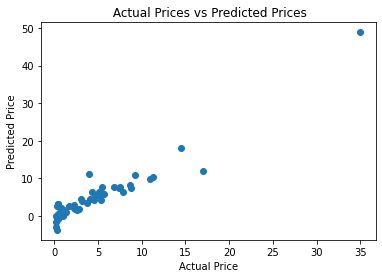

In [46]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [47]:
# loading the linear regression model
lass_reg_model = Lasso()

In [48]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [49]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [50]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8596203747097241


In [51]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [52]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7247058093539276


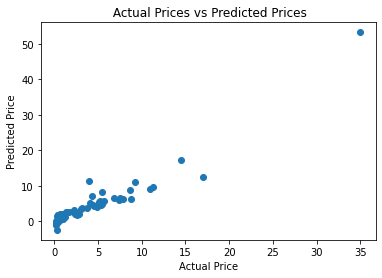

In [53]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

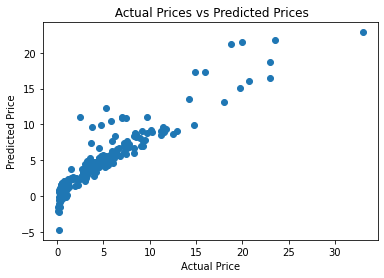

In [54]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Random Forest Regressor

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [56]:
from sklearn.ensemble import RandomForestRegressor
modelr=RandomForestRegressor()
modelr.fit(X_train,Y_train)
modelr.score(X_test,Y_test)

0.5150275902178463

**Conclusions from EDA**
- The maximum Selling Price was recorded to be in the year 2018.
- Present price for few rows are more than the selling price and vice-versa.
- Petrol is the popular choice for fuels. and the year 2015 has the highest usage of fuels
- Manual selling prices are abit higher than automatic vehicles
- More the car driven lesser is the selling price. statement also generally depends on the value of the car.
- People sell their cars or prefer to sell their cars thru dealerships. genrally they replace their old car and buy a new one?

**Model Conclusions**
- Our linear Regression Model has a R-Square value of 79%
- By using lasso regularization it bumps up to 85%
- Our RandomForestReggressor has a accuracy of 51%

### Problem Statement 2:
For Question2 either use read_csv if file is csv ....if file is excel then use read_excel<br/>
Chandrashekhar wants to purchase office-space. He does a detailed survey of the offices and corporate complexes in the area, and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools and workplaces; the reputation of the construction companies and builders involved in constructing the apartments; the distance of the offices from highways, freeways and important roads; the facilities around the office space and so on.<br/>
Each of these factors are quantified, normalized and mapped to values on a scale of 0 to 1. Chandrashekhar then makes a table. Each row in the table corresponds to Chandrashekhar Observations for a particular house. If Chandrashekhar has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Chandrashekhar makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.<br/>
Chandrashekhar does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.<br/>
There is one important observation which Chandrashekhar has made.
The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4
Input Format
The first line contains two space separated integers, F and N. Over here, F is the number of observed features. N is the number of rows for which features as well as price per square-foot have been noted.<br/>
This is followed by a table having F+1 columns and N rows with each row in a new line and each column separated by a single space. The last column is the price per square foot.<br/>
The table is immediately followed by integer T followed by T rows containing F columns.<br/>
Constraints<br/>
1 <= F <= 5<br/>
5 <= N <= 100<br/>
1 <= T <= 100<br/>
0 <= Price Per Square Foot <= 10^6 0 <= Factor Values <= 1<br/>


In [57]:
df1=pd.read_csv('data2.csv') #reading csv

In [58]:
df1.head()

,0.44,0.68,511.14
0,0.99,0.23,717.10
1,0.84,0.29,607.91
2,0.28,0.45,270.40
3,0.07,0.83,289.88
4,0.66,0.88,30.85


In [59]:
df1.shape # checking shape

(99, 3)

In [60]:
import numpy as np

In [61]:
x=df1.iloc[:,:-1].values

In [62]:
x.shape

(99, 2)

In [63]:
len(x)

99

In [64]:
y=df1.iloc[:,-1].values

In [65]:
len(y)

99

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [68]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [69]:
y_preds=model1.predict(x_test)
y_pred=y_preds.tolist()
y_testy=y_test.tolist()

for i in range(len(y_pred)):
  print(f'{round(y_pred[i],2)}-->{y_testy[i]}')

182.02-->202.01
112.01-->174.59
274.4-->272.12
844.91-->851.25
503.36-->434.53
796.3-->775.68
773.27-->745.3
413.04-->355.96
1104.96-->1242.52
758.52-->717.1
478.9-->408.6
571.98-->518.29
-255.37-->42.08
924.38-->72.21
1076.63-->1193.7
896.29-->30.85
382.17-->332.4
1151.95-->1339.72
767.51-->726.9
589.47-->534.24


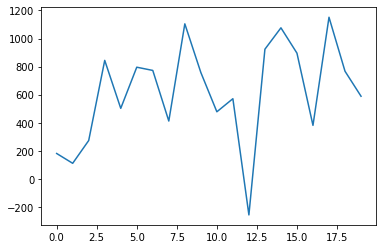

In [70]:
plt.plot(y_preds)

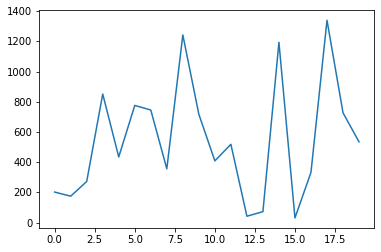

In [71]:
plt.plot(y_test)

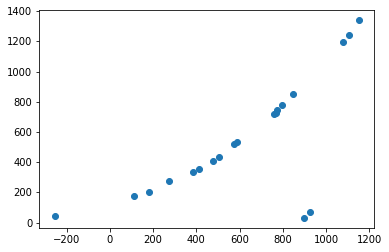

In [72]:
plt.scatter(y_pred,y_test)

In [81]:
# Model Performance
from sklearn import metrics as sm
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 101.85
Mean squared error(MSE) = 77979.2
Median absolute error = 11.42
Explain variance score = 0.52


In [73]:
polynomial=PolynomialFeatures(degree=3)
x_train=polynomial.fit_transform(x_train)
x_test=polynomial.fit_transform(x_test)

In [74]:
model2=LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [75]:
y_preds=model2.predict(x_test)
y_pred=y_preds.tolist()
y_testy=y_test.tolist()

for i in range(len(y_pred)):
  print(f'{round(y_pred[i],2)}-->{y_testy[i]}')

190.68-->202.01
149.32-->174.59
230.01-->272.12
838.68-->851.25
421.84-->434.53
765.56-->775.68
742.0-->745.3
354.7-->355.96
1252.6-->1242.52
713.27-->717.1
418.19-->408.6
486.77-->518.29
110.43-->42.08
958.24-->72.21
1205.21-->1193.7
905.69-->30.85
335.38-->332.4
1336.4-->1339.72
723.78-->726.9
521.07-->534.24


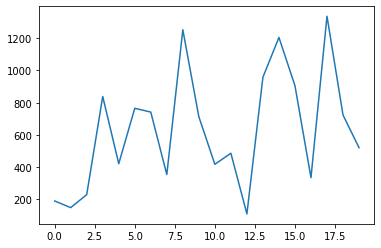

In [76]:
plt.plot(y_preds)

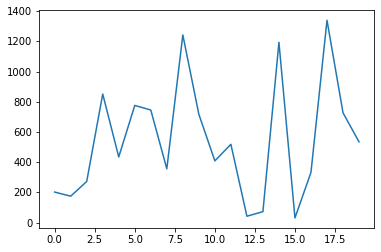

In [77]:
plt.plot(y_test)

In [78]:
model2.coef_

array([   0.        , -246.44071915, -167.89238418,  935.48507283,
        745.97806482,  485.47892107, -268.94684469,  147.29717406,
        -98.08726289,  -68.70451035])

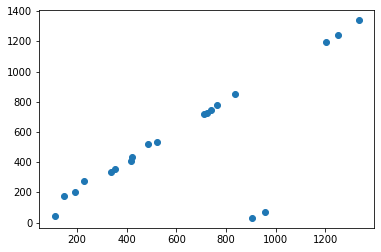

In [79]:
plt.scatter(y_pred,y_test)

1. Used Multiple Linear regression model and Polynomial Regression model. 
2. Have Ploted scater Plots and line plots for the data. Almost all the points are on the regression line,hence Polynomial regression model is best to decide "price per square foot".
3. Hence, for these DataSet ,Polynomial Regression model is more accurate than Multiple Linear regression model




